# Introduction

This project aims to understand the reason for absenteeism at work. The data has been collected in Brazil and the analysis of this dataset will be subjected to the reasons provided by employees in the context of this country.

Absenteeism at work (collected in Brazil)
database from https://archive.ics.uci.edu/ml/datasets/Myocardial+infarction+complications

The dataset contains information such as diseases given by employees as their reason of absence, and also contains information such as month/day of absence, transportation expense, distance from residence to work, service time, age,, etc.

The aim is to apply clustering techniques on the dataset to get a better understanding of the reason for absenteeism among these employees. 

To get an employee-level data (since we want to build clusters for employees) we need to aggregate transactions by employees and engineer employee-level features.

- This step blends together exploratory analysis, data cleaning, and feature engineering.

## Import Libraries

In [765]:
# import numpy
import numpy as np

# import pandas
import pandas as pd
pd.set_option('display.max_columns', 100)

# import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# import Seaborn
import seaborn as sns
sns.set_style('darkgrid')

# StandardScaler from Scikit-learn
from sklearn.preprocessing import StandardScaler

# PCA from Skikit-learn
from sklearn.decomposition import PCA

# Scikit-learn pipeline function
from sklearn.pipeline import make_pipeline

# Scikit-learn's KMeans Clustering algorithm
from sklearn.cluster import KMeans

# Scikit-learn Adjusted rand score for comparig clusters
from sklearn.metrics import adjusted_rand_score

### Read dataset

In [766]:
# Read the dataset 

df = pd.read_csv('Absenteeism_at_work.csv')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,2


## Exploratory Analysis

### I. Describe the dataset

In [767]:
# Dataframe dimension
df.shape

(740, 21)

In [768]:
# Summarize numerical features
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [769]:
# Summarize categorical features - using the include argument
df.describe(include=['object'])

,Work load Average/day
count,740
unique,38
top,"222,196"
freq,36


In [770]:
# Check the data types of the columns
df.dtypes

ID                                  int64
Reason for absence                  int64
Month of absence                    int64
Day of the week                     int64
Seasons                             int64
Transportation expense              int64
Distance from Residence to Work     int64
Service time                        int64
Age                                 int64
Work load Average/day              object
Hit target                          int64
Disciplinary failure                int64
Education                           int64
Son                                 int64
Social drinker                      int64
Social smoker                       int64
Pet                                 int64
Weight                              int64
Height                              int64
Body mass index                     int64
Absenteeism time in hours           int64
dtype: object

### II. Distributions

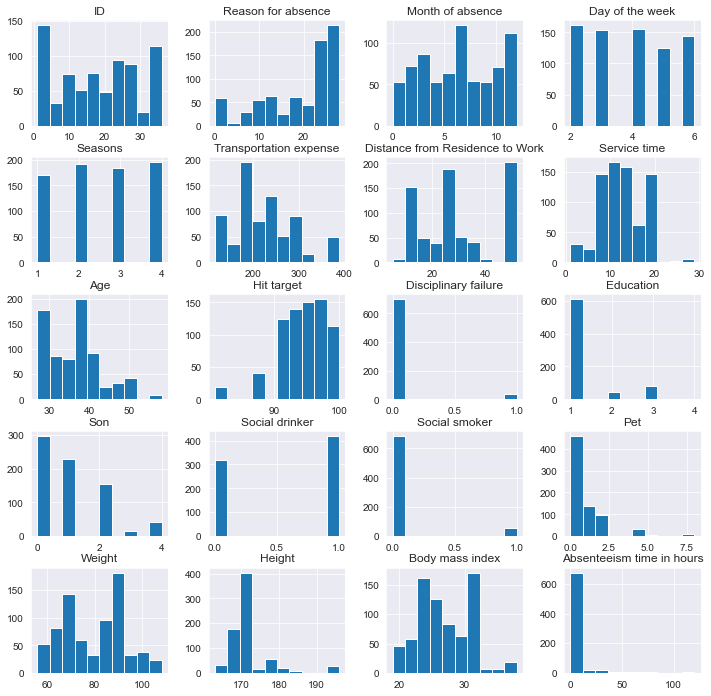

In [771]:
# Plot histogram grid
df.hist(figsize=(12,12))

plt.show()

### III. Correlations

In [772]:
# Calculate correlation between numeric features
correlations = df.corr()

In [773]:
correlations

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,1.000000,-0.064245,-0.000043,0.034468,0.098495,-0.224163,-0.486160,-0.272704,0.040899,0.018789,0.004502,-0.036254,0.002767,-0.451338,-0.010826,-0.041418,-0.254222,0.076363,-0.306924,-0.017997
Reason for absence,-0.064245,1.000000,-0.083858,0.116319,-0.117925,-0.119381,0.161831,0.048425,-0.078608,0.088943,-0.545054,-0.047357,-0.055364,0.065441,-0.115702,-0.055911,-0.000269,-0.079267,0.037205,-0.173116
Month of absence,-0.000043,-0.083858,1.000000,-0.006528,0.407770,0.137525,-0.003887,-0.062862,-0.001520,-0.460453,0.107946,-0.066128,0.079031,0.056226,-0.038603,0.047787,0.023278,-0.068942,0.051046,0.024345
Day of the week,0.034468,0.116319,-0.006528,1.000000,0.046493,0.033988,0.118026,0.021252,0.004459,0.030986,-0.015120,0.058516,0.098079,0.041772,0.013156,-0.028885,-0.128980,-0.082133,-0.103578,-0.124361
Seasons,0.098495,-0.117925,0.407770,0.046493,1.000000,0.036995,-0.063108,-0.010904,-0.012089,-0.061154,0.151766,-0.002951,0.046950,-0.045982,-0.048671,0.012356,-0.026278,-0.033737,-0.011031,-0.005615
Transportation expense,-0.224163,-0.119381,0.137525,0.033988,0.036995,1.000000,0.262183,-0.349887,-0.227542,-0.080193,0.109222,-0.055065,0.383001,0.145117,0.044356,0.400080,-0.207435,-0.194496,-0.136517,0.027585
Distance from Residence to Work,-0.486160,0.161831,-0.003887,0.118026,-0.063108,0.262183,1.000000,0.131730,-0.145886,-0.013865,-0.056527,-0.259605,0.054230,0.452196,-0.075369,0.205941,-0.047859,-0.353372,0.113772,-0.088363
Service time,-0.272704,0.048425,-0.062862,0.021252,-0.010904,-0.349887,0.131730,1.000000,0.670979,-0.007840,-0.000221,-0.213000,-0.047128,0.353141,0.072424,-0.440301,0.455975,-0.053135,0.499718,0.019029
Age,0.040899,-0.078608,-0.001520,0.004459,-0.012089,-0.227542,-0.145886,0.670979,1.000000,-0.039224,0.104304,-0.221882,0.056984,0.213183,0.121738,-0.231226,0.418730,-0.062997,0.470688,0.065760
Hit target,0.018789,0.088943,-0.460453,0.030986,-0.061154,-0.080193,-0.013865,-0.007840,-0.039224,1.000000,-0.147971,0.101062,-0.014091,-0.102480,0.051254,0.007201,-0.044947,0.093267,-0.088939,0.026695


<AxesSubplot:>

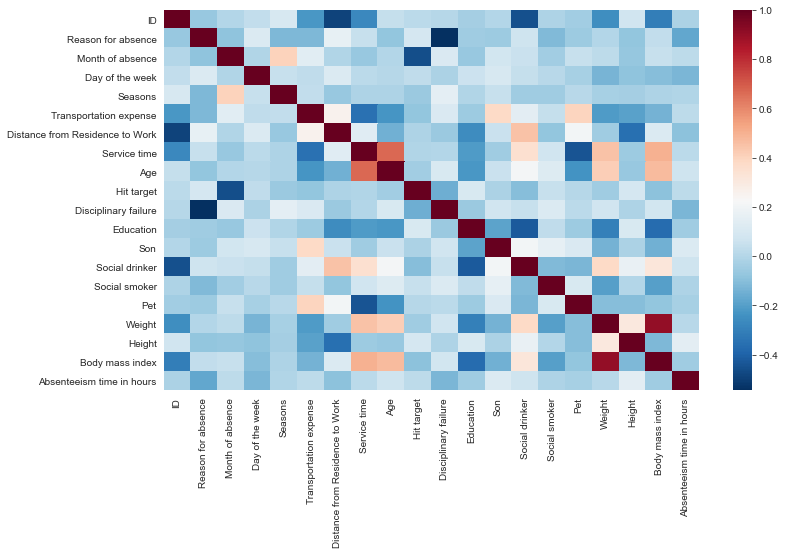

In [774]:
# Plot the correlation map
plt.figure(figsize=(12,7))

# Plot heatmap of correlations
sns.heatmap(correlations, cmap='RdBu_r')

### Note: There are few correlations that we can notice here:
- Month of absence / Hit Target
- Reason for absence / Disciplinary Failure
- Education / Social Drinker
- Pet / Service Time

Will such correlations help to reveal more information suring the clustering analysis?

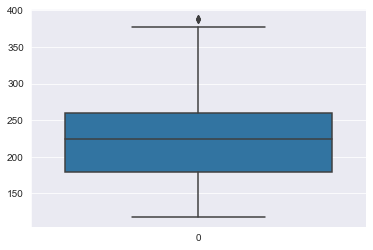

In [775]:
# Box plot
sns.boxplot(data=df['Transportation expense'])
plt.show()

#### Note: The transportation expense mostly varies roughly between 180 and 260. The employees mostly spend same amount of money for their transportation.

In [615]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,2


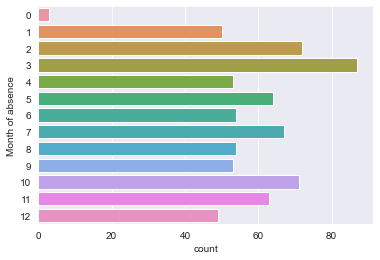

In [616]:
# Bar plot for 'Month of absence'
sns.countplot(y='Month of absence', data=df)
plt.show()

#### Note: A high level of absence noted in the 3rd month

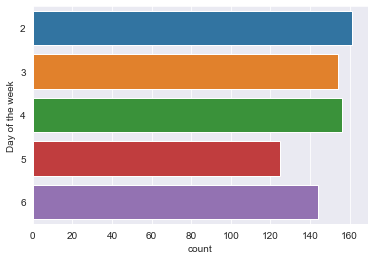

In [617]:
# Bar plot for 'Day of the week'
sns.countplot(y='Day of the week', data=df)
plt.show()

#### Note: There is no big demarcation in terms of days for the absenteeism level.

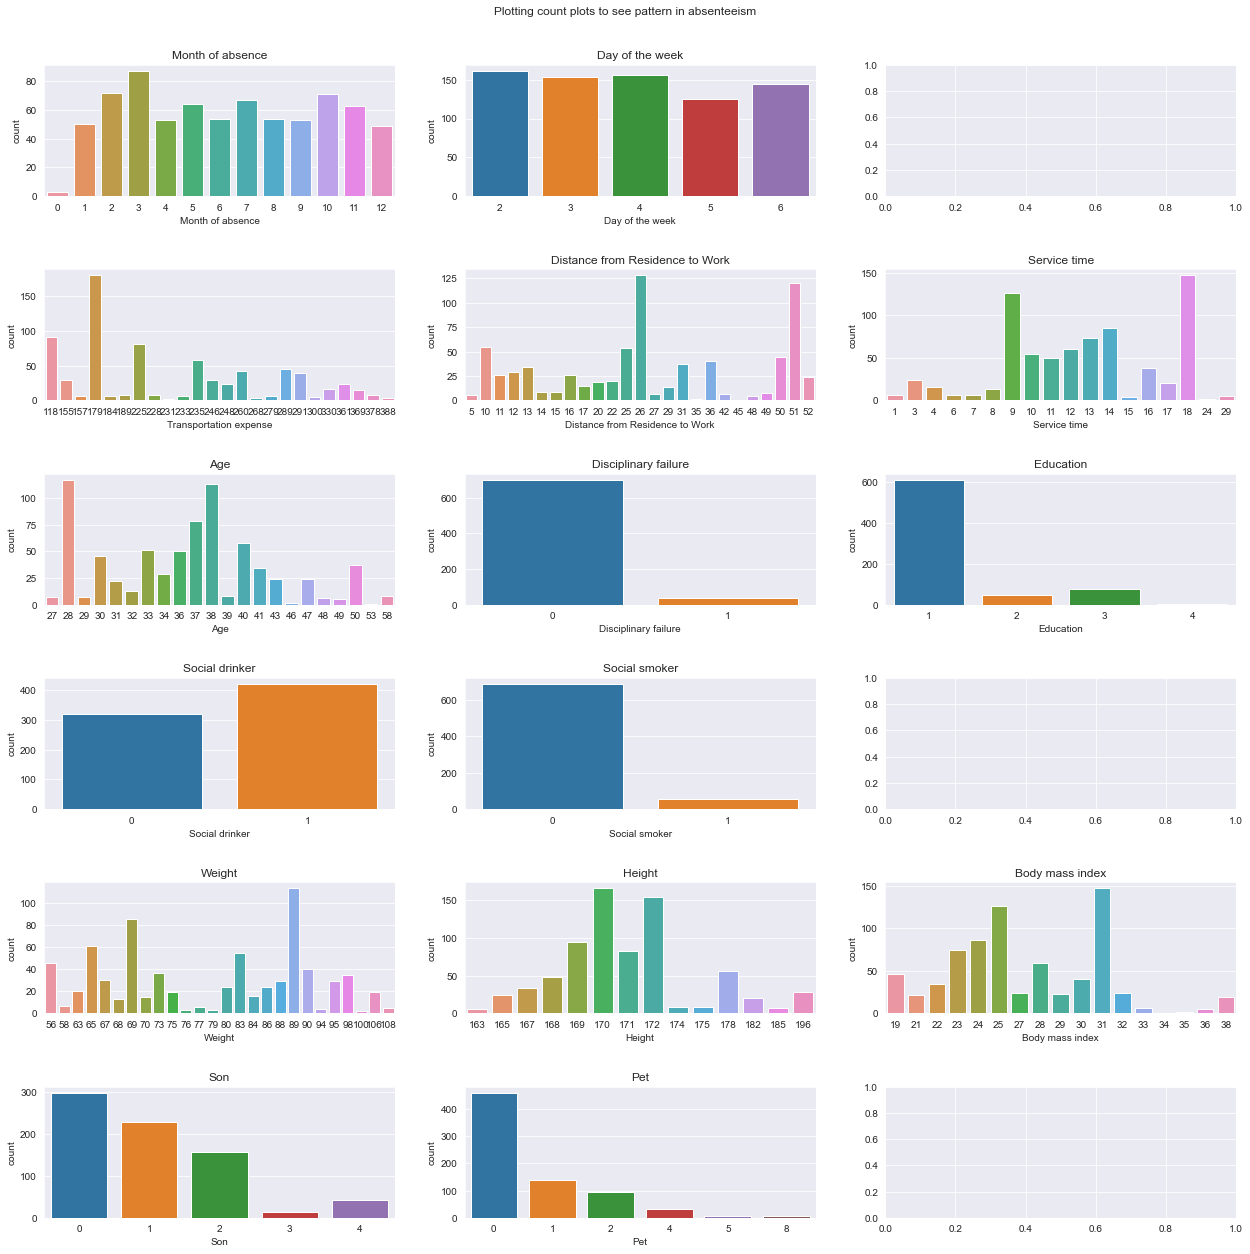

In [777]:
# Plotting count of people absent as per different features
fig, axs = plt.subplots(6, 3, sharex=False, figsize=(18, 18))   # fig, axs = plt.subplots(ncols=2, nrows=1)
fig.suptitle('Plotting count plots to see pattern in absenteeism')
axs[0][0].set_title('Month of absence')
axs[0][1].set_title('Day of the week')
axs[1][1].set_title('Distance from Residence to Work')
axs[1][2].set_title('Service time')
axs[2][0].set_title('Age')
axs[2][1].set_title('Disciplinary failure')
axs[2][2].set_title('Education')
axs[3][0].set_title('Social drinker')
axs[3][1].set_title('Social smoker')
axs[4][0].set_title('Weight')
axs[4][1].set_title('Height')
axs[4][2].set_title('Body mass index')
axs[5][0].set_title('Son')
axs[5][1].set_title('Pet')


sns.countplot(ax=axs[0, 0], data=df, x='Month of absence')
sns.countplot(ax=axs[0, 1], data=df, x='Day of the week')
#sns.countplot(ax=axs[0, 2], data=df, x='Season')

sns.countplot(ax=axs[1, 0], data=df, x='Transportation expense')
sns.countplot(ax=axs[1, 1], data=df, x='Distance from Residence to Work')
sns.countplot(ax=axs[1, 2], data=df, x='Service time')

sns.countplot(ax=axs[2, 0], data=df, x='Age')
sns.countplot(ax=axs[2, 1], data=df, x='Disciplinary failure')
sns.countplot(ax=axs[2, 2], data=df, x='Education')

sns.countplot(ax=axs[3, 0], data=df, x='Social drinker')
sns.countplot(ax=axs[3, 1], data=df, x='Social smoker')

sns.countplot(ax=axs[4, 0], data=df, x='Weight')
sns.countplot(ax=axs[4, 1], data=df, x='Height')
sns.countplot(ax=axs[4, 2], data=df, x='Body mass index')

sns.countplot(ax=axs[5, 0], data=df, x='Son')
sns.countplot(ax=axs[5, 1], data=df, x='Pet')

fig.tight_layout(pad=3.0)
plt.show()

#### Note: The age range varies as well as the service time. The Distance to Work and Transportation expense look quite uniform except for few outliers. 

#### Other information such as Weight/Height/BMI can help to shed more light on the diseases stated by the employees.
 - maybe we should perform a further correlation with these features against the number of diseases stated by an employee
 - and probably also try a linear regression plot

In [619]:
# Create dataframe for Service Time and Absenteeism
df_servicetime = df[['Service time', 'Absenteeism time in hours']]
df_servicetime.head()

,Service time,Absenteeism time in hours
0,13,4
1,18,0
2,18,2
3,14,4
4,13,2


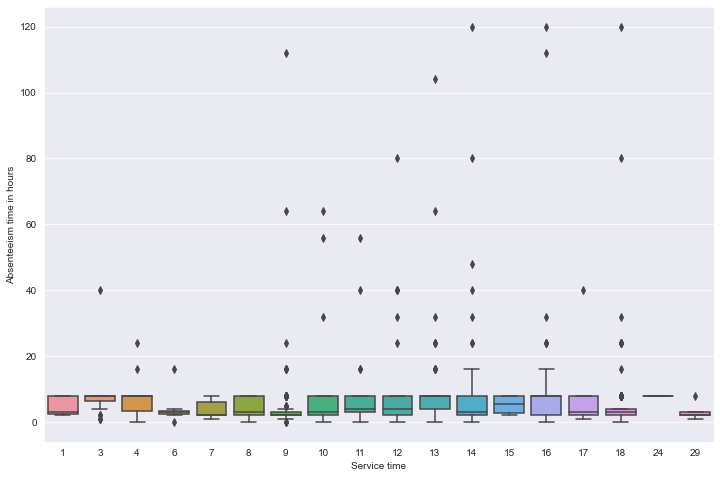

In [620]:
# Plot Service Time and Absenteeism in hours
fig = plt.figure(figsize=(12,8))

sns.boxplot(x='Service time', y = 'Absenteeism time in hours', data = df_servicetime)
plt.show()

#### Note: The service time does not seem to influence the absenteeism rate.

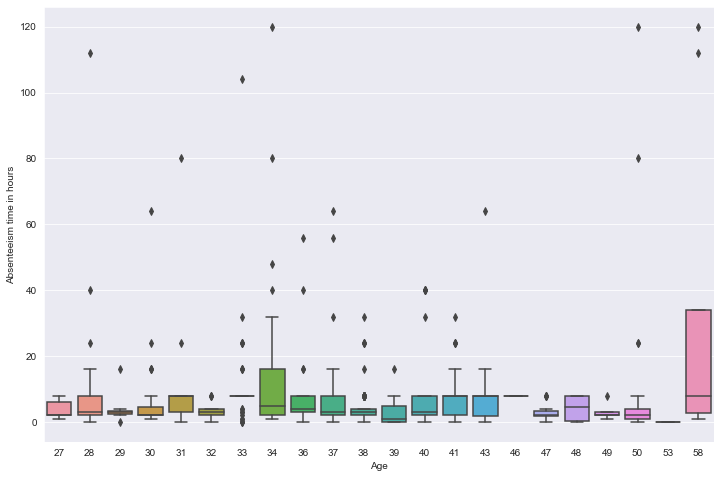

In [621]:
# Plot Age and Absenteeism in hours
fig = plt.figure(figsize=(12,8))

sns.boxplot(x='Age', y = 'Absenteeism time in hours', data = df)
plt.show()

#### Note: The age range varies, and there seems to be a trend in the absenteeism rate.

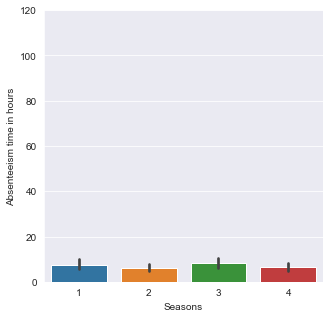

In [780]:
# Plot Seasons and Absenteeism in hours
fig = plt.figure(figsize=(5,5))

plt.ylim(0, 120)

sns.barplot(x='Seasons', y = 'Absenteeism time in hours', data = df)
plt.show()

#### Note: There is not much correlation between Seasons and Absenteeism rate. 

In [623]:
# Perform boolean masking to retrieve specific results from the dataset
temp = df[df['Absenteeism time in hours'] == 120]
#temp.reset_index(drop=True, inplace=True) 
temp.set_index('ID', inplace=True)
temp

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,,,,,,,,,,,,,,,,,,,,
14,11,11,2,4,155,12,14,34,"284,031",97,0,1,2,1,0,0,95,196,25,120
36,13,4,4,3,118,13,18,50,"239,409",98,0,1,1,1,0,0,98,178,31,120
9,6,7,3,1,228,14,16,58,"264,604",93,0,1,2,0,0,1,65,172,22,120


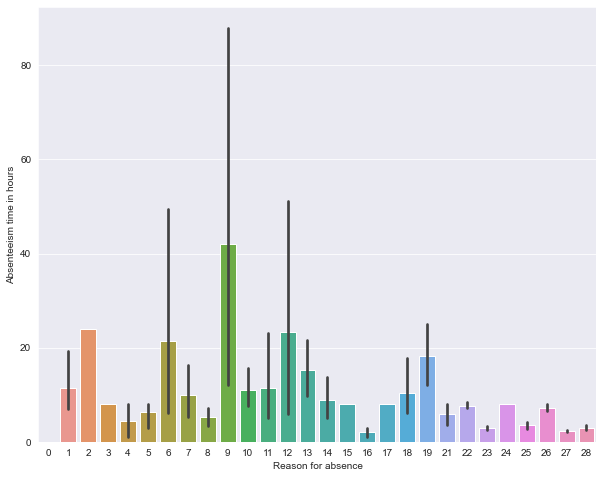

In [624]:
# Plot Reason for Absence and Absenteeism in hours
fig = plt.figure(figsize=(10,8))

sns.barplot(x='Reason for absence', y = 'Absenteeism time in hours', data = df)
plt.show()

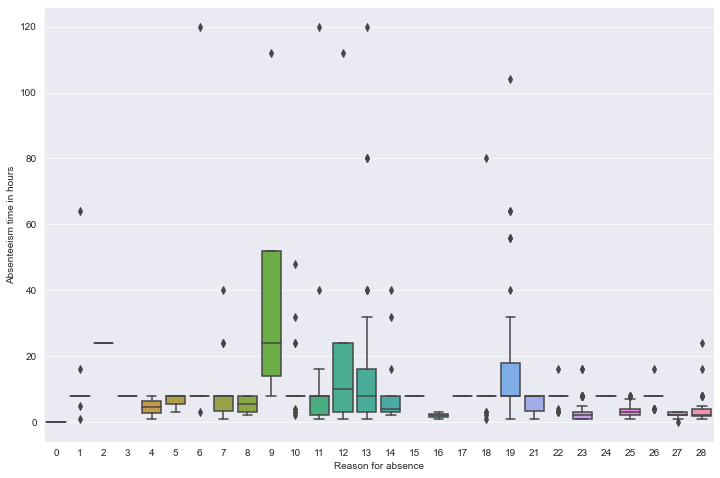

In [625]:
# Plot Reason for absence and Absenteeism in hours
fig = plt.figure(figsize=(12,8))

sns.boxplot(x='Reason for absence', y = 'Absenteeism time in hours', data = df)
plt.show()

#### Note: One particular reason seems to stand out in having a high absenteeism rate. There are other reasons which also seem to account for the high absenteeism rate. 

In [778]:
# Perform boolean masking to retrieve specific results from the dataset
temp = df[df['Reason for absence'] == 9]
temp

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
274,24,9,9,2,1,246,25,16,41,"294,217",81,0,1,0,1,0,0,67,170,23,16
279,24,9,9,4,1,246,25,16,41,"294,217",81,0,1,0,1,0,0,67,170,23,32
471,28,9,7,3,1,225,26,9,28,"230,290",92,0,1,1,0,0,2,69,169,24,112
536,34,9,11,3,4,118,10,10,37,"268,519",93,0,1,0,0,0,0,83,172,28,8


### Get the descriptions for the reasons for absence 

In [627]:
# Read the dataset on Disease Categories
df_disease = pd.read_csv('DiseaseCategories.csv')
#df_disease.reset_index(drop=True, inplace=True)
df_disease.set_index('ID', inplace=True)
df_disease.head()

,Disease,ICD
ID,,
1,Certain infectious and parasitic diseases,1
2,Neoplasms,1
3,Diseases of the blood and blood-forming organs...,1
4,"Endocrine, nutritional and metabolic diseases",1
5,Mental and behavioural disorders,1


In [628]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,2


In [781]:
# Concatenate the two dataframes - df and Disease Categories
df['EmpID'] = df['ID']
# Remove the index - EmpID will be used to groupby
del df['ID']

df_new = pd.merge(df, df_disease, left_on='Reason for absence', right_on='ID', how='left').set_index('EmpID')

df_new.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Disease,ICD
EmpID,,,,,,,,,,,,,,,,,,,,,,
11,26,7,3,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,4,Unjustified Absence,0.0
36,0,7,3,1,118,13,18,50,"239,554",97,1,1,1,1,0,0,98,178,31,0,NaN,NaN
3,23,7,4,1,179,51,18,38,"239,554",97,0,1,0,1,0,0,89,170,31,2,Medical Consultation,0.0
7,7,7,5,1,279,5,14,39,"239,554",97,0,1,2,1,1,0,68,168,24,4,Diseases of the eye and adnexa,1.0
11,23,7,5,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,2,Medical Consultation,0.0


In [788]:
# Check to see how many rows there are for Reason for absence=0, Disease=0, ICD=0
len(df_new[np.isnan(df_new['ICD'])])

43

In [631]:
df_new[df_new['ICD'] == 0]

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Disease,ICD
EmpID,,,,,,,,,,,,,,,,,,,,,,
11,26,7,3,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,4,Unjustified Absence,0.0
3,23,7,4,1,179,51,18,38,"239,554",97,0,1,0,1,0,0,89,170,31,2,Medical Consultation,0.0
11,23,7,5,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,2,Medical Consultation,0.0
3,23,7,6,1,179,51,18,38,"239,554",97,0,1,0,1,0,0,89,170,31,2,Medical Consultation,0.0
10,22,7,6,1,361,52,3,28,"239,554",97,0,1,1,1,0,4,80,172,27,8,Patient follow-up,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,28,7,2,1,118,10,10,37,"264,604",93,0,1,0,0,0,0,83,172,28,4,Dental Consultation,0.0
6,22,7,3,1,189,29,13,33,"264,604",93,0,1,2,0,0,2,69,167,25,16,Patient follow-up,0.0
34,23,7,4,1,118,10,10,37,"264,604",93,0,1,0,0,0,0,83,172,28,2,Medical Consultation,0.0


##### Convert the ICD to 0 or 1 -- need to convert the float to boolean, then the boolean to int

In [637]:
df_new['ICD'] = df_new['ICD'].astype('int')
df_new.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Disease,ICD
EmpID,,,,,,,,,,,,,,,,,,,,,,
11,26,7,3,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,4,Unjustified Absence,0
36,0,7,3,1,118,13,18,50,"239,554",97,1,1,1,1,0,0,98,178,31,0,NaN,1
3,23,7,4,1,179,51,18,38,"239,554",97,0,1,0,1,0,0,89,170,31,2,Medical Consultation,0
7,7,7,5,1,279,5,14,39,"239,554",97,0,1,2,1,1,0,68,168,24,4,Diseases of the eye and adnexa,1
11,23,7,5,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,2,Medical Consultation,0


#### Note: The ICD can only be 0 or 1. There are 43 rows with missing ICD value, for which the disease is also NaN. Whilst we can label the NaN in Disease category as Missing, we can only replace the ICD by 0 or 1. In this case, it is best to drop the ICD as replacing the NaN by 0 can impact on the interpretation of the results. 

In [638]:
print(df_new.isnull().sum())

Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day               0
Hit target                          0
Disciplinary failure                0
Education                           0
Son                                 0
Social drinker                      0
Social smoker                       0
Pet                                 0
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours           0
Disease                            43
ICD                                 0
dtype: int64


##### Plot an sns catplot using the Disease Category (which is the reason for absence)

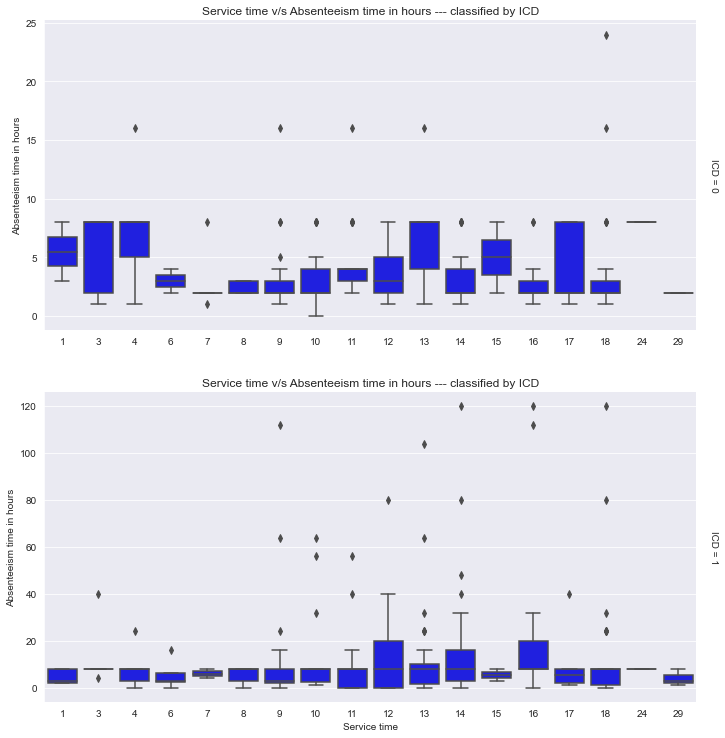

In [641]:
# Plot a catplot for Service time v/s Absenteeism time in hours --- classified by the ICD (International Code Disease)
ax = sns.catplot(data=df_new, x='Service time', y='Absenteeism time in hours',
            row='ICD',
            kind='box',
            height=5,
            aspect=2,
            color='blue',
            sharex=False,
            sharey=False,
            margin_titles=True
          ).set(title='Service time v/s Absenteeism time in hours --- classified by ICD')

plt.subplots_adjust(hspace=0.2)
plt.show()

#### Note: The absenteeism time seems to vary the same way for both ICD=0 or 1

### Do a linear regression plot to understand if there is any relation between BMI and Count of diseases

In [642]:
#rp = sns.regplot(data=df_new, x='Transportation expense', y='Absenteeism time in hours').set(title='Transportation expense vs. Absenteeism time in hours')
#plt.show()

## Data Cleaning

##### Display missing observations by feature
##### Do not Remove reasons for absence - 0 - there are 43 rows; and 67- rows in Disease Categories; Means people who were absent had no ailments, they were absent for some other reason

#### Note: Disease = Unjustified Absence has 33 rows, this is also a significant reason. People did not give any reason, still they have been absent

In [791]:
df_new.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Disease,ICD
EmpID,,,,,,,,,,,,,,,,,,,,,,
11,26,7,3,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,4,Unjustified Absence,0.0
36,0,7,3,1,118,13,18,50,"239,554",97,1,1,1,1,0,0,98,178,31,0,NaN,NaN
3,23,7,4,1,179,51,18,38,"239,554",97,0,1,0,1,0,0,89,170,31,2,Medical Consultation,0.0
7,7,7,5,1,279,5,14,39,"239,554",97,0,1,2,1,1,0,68,168,24,4,Diseases of the eye and adnexa,1.0
11,23,7,5,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,2,Medical Consultation,0.0


#### Find diseases with value NaN - replace with Missing

In [835]:
df_new[df_new['Disease'].isnull()]

#Replace null values with Missing in the Disease column
df_new.fillna({'Disease':'Missing'}, inplace=True)

#Replace the null values with -1 in the ICD column
df_new['ICD'].fillna(-1, inplace=True)

df_new

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Disease,ICD
EmpID,,,,,,,,,,,,,,,,,,,,,,
11,26,7,3,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,4,Unjustified Absence,0.0
36,0,7,3,1,118,13,18,50,"239,554",97,1,1,1,1,0,0,98,178,31,0,Missing,-1.0
3,23,7,4,1,179,51,18,38,"239,554",97,0,1,0,1,0,0,89,170,31,2,Medical Consultation,0.0
7,7,7,5,1,279,5,14,39,"239,554",97,0,1,2,1,1,0,68,168,24,4,Diseases of the eye and adnexa,1.0
11,23,7,5,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,2,Medical Consultation,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,14,7,3,1,289,36,13,33,"264,604",93,0,1,2,1,0,1,90,172,30,8,Diseases of the genitourinary system,1.0
1,11,7,3,1,235,11,14,37,"264,604",93,0,3,1,0,0,1,88,172,29,4,Diseases of the digestive system,1.0
4,0,0,3,1,118,14,13,40,"271,219",95,0,1,1,1,0,8,98,170,34,0,Missing,-1.0


#### Note: ICD has been removed from the analysis, ICD=NaN is not indicative of whether we can set this value to 0

In [655]:
df_new.drop('ICD', axis=1, inplace=True)

In [657]:
df_new

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Disease
EmpID,,,,,,,,,,,,,,,,,,,,,
11,26,7,3,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,4,Unjustified Absence
36,0,7,3,1,118,13,18,50,"239,554",97,1,1,1,1,0,0,98,178,31,0,Missing
3,23,7,4,1,179,51,18,38,"239,554",97,0,1,0,1,0,0,89,170,31,2,Medical Consultation
7,7,7,5,1,279,5,14,39,"239,554",97,0,1,2,1,1,0,68,168,24,4,Diseases of the eye and adnexa
11,23,7,5,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,2,Medical Consultation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,14,7,3,1,289,36,13,33,"264,604",93,0,1,2,1,0,1,90,172,30,8,Diseases of the genitourinary system
1,11,7,3,1,235,11,14,37,"264,604",93,0,3,1,0,0,1,88,172,29,4,Diseases of the digestive system
4,0,0,3,1,118,14,13,40,"271,219",95,0,1,1,1,0,8,98,170,34,0,Missing


#### Keep the Reason for absence - it is redundant but stands for the Disease; will be used in creating dummies for diseases (in PCA)

### Sort the dataframe by EmpID

In [837]:
#### Look for redundant values
ids = df_new.index
df_new[ids.isin(ids[ids.duplicated()])].sort_index()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Disease,ICD
EmpID,,,,,,,,,,,,,,,,,,,,,,
1,19,8,5,1,235,11,14,37,"265,615",94,0,3,1,0,0,1,88,172,29,8,"Injury, poisoning and certain other consequenc...",1.0
1,0,3,5,3,235,11,14,37,"244,387",98,1,3,1,0,0,1,88,172,29,0,Missing,-1.0
1,26,12,4,4,235,11,14,37,"261,306",97,0,3,1,0,0,1,88,172,29,8,Unjustified Absence,0.0
1,26,10,2,4,235,11,14,37,"265,017",88,0,3,1,0,0,1,88,172,29,4,Unjustified Absence,0.0
1,21,3,5,2,235,11,14,37,"244,387",98,0,3,1,0,0,1,88,172,29,8,Factors influencing health status and contact ...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,13,5,4,3,118,13,18,50,"378,884",92,0,1,1,1,0,0,98,178,31,24,Diseases of the musculoskeletal system and con...,1.0
36,19,6,5,3,118,13,18,50,"275,089",96,0,1,1,1,0,0,98,178,31,24,"Injury, poisoning and certain other consequenc...",1.0
36,0,5,3,3,118,13,18,50,"237,656",99,1,1,1,1,0,0,98,178,31,0,Missing,-1.0


### Save the cleaned table 
    - df_new has no missing Emp IDs

In [838]:
cleaned_emp_df = df_new.copy()
cleaned_emp_df.reset_index(inplace=True)

In [839]:
cleaned_emp_df.head(10)

,EmpID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Disease,ICD
0,11,26,7,3,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,4,Unjustified Absence,0.0
1,36,0,7,3,1,118,13,18,50,"239,554",97,1,1,1,1,0,0,98,178,31,0,Missing,-1.0
2,3,23,7,4,1,179,51,18,38,"239,554",97,0,1,0,1,0,0,89,170,31,2,Medical Consultation,0.0
3,7,7,7,5,1,279,5,14,39,"239,554",97,0,1,2,1,1,0,68,168,24,4,Diseases of the eye and adnexa,1.0
4,11,23,7,5,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,2,Medical Consultation,0.0
5,3,23,7,6,1,179,51,18,38,"239,554",97,0,1,0,1,0,0,89,170,31,2,Medical Consultation,0.0
6,10,22,7,6,1,361,52,3,28,"239,554",97,0,1,1,1,0,4,80,172,27,8,Patient follow-up,0.0
7,20,23,7,6,1,260,50,11,36,"239,554",97,0,1,4,1,0,0,65,168,23,4,Medical Consultation,0.0
8,14,19,7,2,1,155,12,14,34,"239,554",97,0,1,2,1,0,0,95,196,25,40,"Injury, poisoning and certain other consequenc...",1.0
9,1,22,7,2,1,235,11,14,37,"239,554",97,0,3,1,0,0,1,88,172,29,8,Patient follow-up,0.0


In [841]:
cleaned_emp_df.to_csv('cleaned_employee.csv', index=None)

### Employee-level Feature Engineering

We want 1 employee per row, and we want the features to represent information such as:

- Number of diseases contracted by the employee 
- Average absenteeism time in hours for the employee 
- Total Absenteeism time in hours for the employee - per month
- Total Absenteeism time in hours for the employee - per day
- Total Absenteeism time in hours for the employee - per transportation expense
- Total Absenteeism in hours for the employee - per age
- Weight or BMI - count of diseases

Use these functions:
- **.groupby() to roll up/aggregate by employee**
- **.agg() to engineer aggregated features**

### I. Month-Level Feature Engineering

We can aggregate the absenteeism time in hours per month, per day of week

In [842]:
month_data = cleaned_emp_df.groupby(['EmpID', 'Month of absence'])['Absenteeism time in hours'].agg(['sum'])
month_data.columns = ['Total_Absenteeism_hours_per_month']

# Display first 10 rows
month_data.head(10)

Total_Absenteeism_hours_per_month
EmpID Month of absence                                   
1     1                                                 1
      3                                                16
      4                                                11
      5                                                16
      6                                                24
      7                                                12
      8                                                17
      10                                                4
      11                                                3
      12                                               17

### II. Day-Level Feature Engineering

In [843]:
day_data = cleaned_emp_df.groupby(['EmpID', 'Day of the week'])['Absenteeism time in hours'].agg(['sum'])
day_data.columns= ['Total_Absenteeism_hours_per_day']
day_data.head(10)

Total_Absenteeism_hours_per_day
EmpID Day of the week                                 
1     2                                             39
      3                                             22
      4                                              9
      5                                             24
      6                                             27
2     2                                              9
      5                                              8
      6                                              8
3     2                                            131
      3                                            110

### Note: Above is intermediary level dataframes - the empID is repeated in the rows; do further aggregation e.g. min, max, avg

#### B.) Aggregate month_data and day_data by employee. Engineer 3 features:
* <code style="color:steelblue">'avg_absenteeism_value'</code> - average cart value by customer.
* <code style="color:steelblue">'min_absenteeism_value'</code> - minimum cart value by customer.
* <code style="color:steelblue">'max_absenteeism_value'</code> - maximum cart value by customer.
* Let's name it <code style="color:crimson">agg_day_data and agg_month_data</code>.

#### Aggregate Month dataframe

In [844]:
agg_month_data = month_data.groupby('EmpID').Total_Absenteeism_hours_per_month.agg(['mean', 'min', 'max'])
agg_month_data.columns = ['avg_month_absenteeism', 'min_month_absenteeism', 'max_month_absenteeism']

# Display the first 5 observations of agg_month_data
agg_month_data.head()

,avg_month_absenteeism,min_month_absenteeism,max_month_absenteeism
EmpID,,,
1,12.100000,1,24
2,6.250000,0,24
3,40.166667,10,99
4,0.000000,0,0
5,11.555556,4,24


#### Aggregate Day dataframe

In [845]:
agg_day_data = day_data.groupby('EmpID').Total_Absenteeism_hours_per_day.agg(['mean', 'min', 'max'])
agg_day_data.columns = ['avg_day_absenteeism', 'min_day_absenteeism', 'max_day_absenteeism']

# Display the first 5 observations of agg_month_data
agg_day_data.head()

,avg_day_absenteeism,min_day_absenteeism,max_day_absenteeism
EmpID,,,
1,24.200000,9,39
2,8.333333,8,9
3,96.400000,53,131
4,0.000000,0,0
5,20.800000,0,44


### III. TransportationExpense-Level Feature Engineering

We can aggregate the absenteeism time in hours per transportation expense

In [846]:
transportation_data = cleaned_emp_df.groupby(['EmpID', 'Transportation expense'])['Absenteeism time in hours'].agg(['sum'])
transportation_data.columns = ['Total_Absenteeism_hours_per_transportation']
transportation_data.reset_index('Transportation expense', inplace=True)
# Display the first 5 observations of transportation_data
transportation_data.head(10)

,Transportation expense,Total_Absenteeism_hours_per_transportation
EmpID,,
1,235,121
2,235,25
3,179,482
4,118,0
5,235,104
6,189,72
7,279,30
8,231,0
9,228,262


### IV. Disease-Level Feature Engineering

#### Aggregate diseases data by employee

In [847]:
disease_data = cleaned_emp_df.groupby(['EmpID', 'Disease', 'Body mass index'])['Absenteeism time in hours'].agg(['sum'])
disease_data.columns = ['Total_Absenteeism_hours_per_disease']

disease_data.reset_index(inplace=True)
# Display the first 5 observations of disease_data
disease_data.head(10)

,EmpID,Disease,Body mass index,Total_Absenteeism_hours_per_disease
0,1,Certain infectious and parasitic diseases,29,8
1,1,Diseases of the digestive system,29,4
2,1,Diseases of the eye and adnexa,29,3
3,1,Diseases of the genitourinary system,29,4
4,1,Diseases of the musculoskeletal system and con...,29,25
5,1,Factors influencing health status and contact ...,29,8
6,1,"Injury, poisoning and certain other consequenc...",29,8
7,1,Laboratory Examination,29,4
8,1,Medical Consultation,29,12
9,1,Missing,29,0


#### Intermediary-level aggregation - Aggregate Disease dataframe further

In [848]:
agg_disease_data = disease_data.groupby(['EmpID']).Total_Absenteeism_hours_per_disease.agg(['mean', 'min', 'max'])
agg_disease_data.columns = ['avg_absenteeism_disease', 'min_absenteeism_disease', 'max_absenteeism_disease']
                                        
#Display the first 5 observations of agg_disease_data
agg_disease_data.head(10)

,avg_absenteeism_disease,min_absenteeism_disease,max_absenteeism_disease
EmpID,,,
1,9.307692,0,32
2,6.250000,0,16
3,34.428571,0,131
4,0.000000,0,0
5,20.800000,0,68
6,14.400000,8,32
7,7.500000,0,24
8,0.000000,0,0
9,52.400000,1,128


#### Count number of unique diseases per Employee together with their BMI

In [1134]:
count_disease_data = disease_data.groupby(['EmpID', 'Body mass index']).Disease.agg(['nunique'])
count_disease_data.columns = ['count_disease_employee']

count_disease_data.reset_index('Body mass index', inplace=True)

#Display the first 5 observations of count_disease_data
count_disease_data.head(10)               

,Body mass index,count_disease_employee
EmpID,,
1,29,13
2,33,4
3,31,14
4,34,1
5,38,5
6,25,5
7,24,4
8,35,1
9,22,5


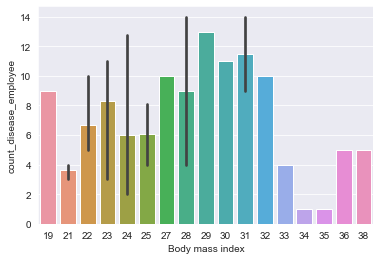

In [850]:
# Plot the barplot of Body mass index and count_disease_employee to see if there is any relation between them
ax = sns.barplot(data=count_disease_data, x='Body mass index', y='count_disease_employee')

plt.subplots_adjust(hspace=0.2)
plt.show()

#### Note: Quite interestingly, people with a high bmi > 33 have lower count of diseases compared to those with lesser bmi. 

#### Get the age of the employees and the total absenteeism time in hours

In [971]:
age_data = cleaned_emp_df.groupby(['EmpID', 'Age'])['Absenteeism time in hours'].agg(['sum'])

age_data.columns = ['Total_Absenteeism_hours_per_age']

age_data.reset_index("Age", inplace=True)

# Display the first 5 observations
age_data.head()

,Age,Total_Absenteeism_hours_per_age
EmpID,,
1,37,121
2,48,25
3,38,482
4,40,0
5,43,104


In [972]:
age_data

,Age,Total_Absenteeism_hours_per_age
EmpID,,
1,37,121
2,48,25
3,38,482
4,40,0
5,43,104
6,33,72
7,39,30
8,39,0
9,58,262


#### Note: EmpID 29 has two entries for Age!!! This ID needs to be removed!

In [973]:
age_data = age_data.drop([age_data.index[29]])

In [974]:
age_data

,Age,Total_Absenteeism_hours_per_age
EmpID,,
1,37,121
2,48,25
3,38,482
4,40,0
5,43,104
6,33,72
7,39,30
8,39,0
9,58,262


### V. Count reasons for absence against the disciplinary failure

In [853]:
disciplinary_data = cleaned_emp_df.groupby(['EmpID', 'Disciplinary failure'])['Reason for absence'].agg(['count'])

disciplinary_data.columns = ['Count_reason_for_absence']

disciplinary_data.head()

Count_reason_for_absence
EmpID Disciplinary failure                          
1     0                                           22
      1                                            1
2     0                                            4
      1                                            2
3     0                                          112

#### Note: There does not seem to be any connection between disciplinary failure and reasons for absence

### Join the various employee-level feature-engineered datasets

In [1137]:
employee_df = agg_month_data.join([age_data, agg_day_data, transportation_data, agg_disease_data, count_disease_data])

# Display the resulting dataset
employee_df.head()

,avg_month_absenteeism,min_month_absenteeism,max_month_absenteeism,Age,Total_Absenteeism_hours_per_age,avg_day_absenteeism,min_day_absenteeism,max_day_absenteeism,Transportation expense,Total_Absenteeism_hours_per_transportation,avg_absenteeism_disease,min_absenteeism_disease,max_absenteeism_disease,Body mass index,count_disease_employee
EmpID,,,,,,,,,,,,,,,
1,12.100000,1,24,37.0,121.0,24.200000,9,39,235,121,9.307692,0,32,29,13
2,6.250000,0,24,48.0,25.0,8.333333,8,9,235,25,6.250000,0,16,33,4
3,40.166667,10,99,38.0,482.0,96.400000,53,131,179,482,34.428571,0,131,31,14
4,0.000000,0,0,40.0,0.0,0.000000,0,0,118,0,0.000000,0,0,34,1
5,11.555556,4,24,43.0,104.0,20.800000,0,44,235,104,20.800000,0,68,38,5


In [1139]:
### Remove the EmpID=29 from the dataset
employee_df = employee_df.drop(employee_df.index[29])

In [1140]:
employee_df

,avg_month_absenteeism,min_month_absenteeism,max_month_absenteeism,Age,Total_Absenteeism_hours_per_age,avg_day_absenteeism,min_day_absenteeism,max_day_absenteeism,Transportation expense,Total_Absenteeism_hours_per_transportation,avg_absenteeism_disease,min_absenteeism_disease,max_absenteeism_disease,Body mass index,count_disease_employee
EmpID,,,,,,,,,,,,,,,
1,12.100000,1,24,37.0,121.0,24.200000,9,39,235,121,9.307692,0,32,29,13
2,6.250000,0,24,48.0,25.0,8.333333,8,9,235,25,6.250000,0,16,33,4
3,40.166667,10,99,38.0,482.0,96.400000,53,131,179,482,34.428571,0,131,31,14
4,0.000000,0,0,40.0,0.0,0.000000,0,0,118,0,0.000000,0,0,34,1
5,11.555556,4,24,43.0,104.0,20.800000,0,44,235,104,20.800000,0,68,38,5
6,14.400000,8,24,33.0,72.0,24.000000,16,32,189,72,14.400000,8,32,25,5
7,7.500000,0,24,39.0,30.0,7.500000,0,22,279,30,7.500000,0,24,24,4
8,0.000000,0,0,39.0,0.0,0.000000,0,0,231,0,0.000000,0,0,35,1
9,52.400000,1,128,58.0,262.0,87.333333,8,243,228,262,52.400000,1,128,22,5


### Save the analytical base table

In [1141]:
employee_df.to_csv('employee_analytical_base_table.csv')

## Algorithm Selection

### I. Dimensionality Reduction
We've created an employee-level analytical base table with important features such as:
- Number of diseases contracted by the employee 
  - Diseases categorised by ICD - True/False
- Average absenteeism time in hours for the employee 
- Total Absenteeism time in hours for the employee - per month
- Total Absenteeism time in hours for the employee - per day
- Total Absenteeism time in hours for the employee - per transportation expense

However, information about the diseases mentioned as reason by the employees should also be considered. 

#### Read the cleaned dataframe

In [1142]:
cleaned_df = pd.read_csv('cleaned_employee.csv')

In [1143]:
cleaned_df.head()

,EmpID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Disease,ICD
0,11,26,7,3,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,4,Unjustified Absence,0.0
1,36,0,7,3,1,118,13,18,50,"239,554",97,1,1,1,1,0,0,98,178,31,0,Missing,-1.0
2,3,23,7,4,1,179,51,18,38,"239,554",97,0,1,0,1,0,0,89,170,31,2,Medical Consultation,0.0
3,7,7,7,5,1,279,5,14,39,"239,554",97,0,1,2,1,1,0,68,168,24,4,Diseases of the eye and adnexa,1.0
4,11,23,7,5,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,2,Medical Consultation,0.0


In [1144]:
cleaned_df[cleaned_df['EmpID'] == 29]

,EmpID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Disease,ICD
51,29,0,9,2,4,225,26,9,28,"241,476",92,1,1,1,0,0,2,69,169,24,0,Missing,-1.0
592,29,28,2,6,2,225,15,15,41,"264,249",97,0,4,2,1,0,2,94,182,28,2,Dental Consultation,0.0
675,29,19,5,4,3,225,15,15,41,"237,656",99,0,4,2,1,0,2,94,182,28,3,"Injury, poisoning and certain other consequenc...",1.0
681,29,14,5,5,3,225,15,15,41,"237,656",99,0,4,2,1,0,2,94,182,28,8,Diseases of the genitourinary system,1.0
683,29,22,5,6,3,225,15,15,41,"237,656",99,0,4,2,1,0,2,94,182,28,8,Patient follow-up,0.0


In [1145]:
### Drop EmpID=29

index_ids = cleaned_df[cleaned_df['EmpID'] == 29].index
cleaned_df.drop(index_ids, inplace=True)

#### A. Display the first 10 Diseases and Descriptions from the cleaned transaction dataset.

In [1146]:
cleaned_df[['Reason for absence', 'Disease']].head(10)

,Reason for absence,Disease
0,26,Unjustified Absence
1,0,Missing
2,23,Medical Consultation
3,7,Diseases of the eye and adnexa
4,23,Medical Consultation
5,23,Medical Consultation
6,22,Patient follow-up
7,23,Medical Consultation
8,19,"Injury, poisoning and certain other consequenc..."
9,22,Patient follow-up


#### B. Display the number of unique diseases in the dataset

In [1147]:
len(cleaned_df['Reason for absence'].unique())

28

### Toy example
 - choose a reason for absence where not many employees will have used this reason)

In [1148]:
absence_id = cleaned_df['Reason for absence'].unique()
len(absence_id)

28

#### A. Query from the dataframe for the reason for absence with lowest score (no. of rows)

In [1149]:
for abs_id in absence_id:
    rows = cleaned_df.query('`Reason for absence` == @abs_id')
    print("No. of rows {} for reason for absence {}".format(len(rows), abs_id))
    print('-------')
   
    continue

No. of rows 33 for reason for absence 26
-------
No. of rows 42 for reason for absence 0
-------
No. of rows 149 for reason for absence 23
-------
No. of rows 15 for reason for absence 7
-------
No. of rows 37 for reason for absence 22
-------
No. of rows 39 for reason for absence 19
-------
No. of rows 16 for reason for absence 1
-------
No. of rows 26 for reason for absence 11
-------
No. of rows 18 for reason for absence 14
-------
No. of rows 6 for reason for absence 21
-------
No. of rows 25 for reason for absence 10
-------
No. of rows 55 for reason for absence 13
-------
No. of rows 111 for reason for absence 28
-------
No. of rows 21 for reason for absence 18
-------
No. of rows 31 for reason for absence 25
-------
No. of rows 3 for reason for absence 24
-------
No. of rows 8 for reason for absence 6
-------
No. of rows 69 for reason for absence 27
-------
No. of rows 1 for reason for absence 17
-------
No. of rows 6 for reason for absence 8
-------
No. of rows 8 for reason for

#### B. Using Reason for absence - 17, 24  (taken from above)

In [1150]:
toy_df = cleaned_df[cleaned_df['Reason for absence'].isin([17, 24])]

toy_df.head()

,EmpID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Disease,ICD
36,11,24,8,3,1,289,36,13,33,"205,917",92,0,1,2,1,0,1,90,172,30,8,Blood Donation,0.0
158,17,17,3,3,2,179,22,17,40,"343,253",95,0,2,2,0,1,0,63,170,22,8,"Congenital malformations, deformations and chr...",1.0
289,11,24,10,2,4,289,36,13,33,"265,017",88,0,1,2,1,0,1,90,172,30,8,Blood Donation,0.0
537,11,24,11,4,4,289,36,13,33,"268,519",93,0,1,2,1,0,1,90,172,30,8,Blood Donation,0.0


#### C. Create a dataframe of dummy variables for 'Reason for absence'

In [1151]:
# Get toy_reason_dummies
toy_reason_dummies = pd.get_dummies(toy_df['Reason for absence'])

# Add EmpID to toy_dummies
toy_reason_dummies['EmpID']  = toy_df['EmpID']

# Display toy_reason_dummies
toy_reason_dummies

,17,24,EmpID
36,0,1,11
158,1,0,17
289,0,1,11
537,0,1,11


#### D. Aggregate this information to the employee level

In [1152]:
toy_reason_data = toy_reason_dummies.groupby('EmpID').agg('sum')

# Display the toy_reason_data
toy_reason_data

,17,24
EmpID,,
11,0,3
17,1,0


We have **employee-level** features that represent the **number of times an employee gave a reason for absence**, and each unique item has its own feature.

That's exactly the type of information we want to include in our clustering model!

### Using the actual dataframe instead of toy_df

In [1153]:
# Create reason_dummies
reason_dummies = pd.get_dummies(cleaned_df['Reason for absence'])

# Add Employee ID to the dataframe
reason_dummies['EmpID']  = cleaned_df['EmpID']

# Display the first 5 rows of the dataframe
reason_dummies.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,EmpID
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,11
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,11


#### Aggregate the above dataset to employee-level

In [1154]:
reason_data = reason_dummies.groupby('EmpID').agg('sum')

reason_data.head(12)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,0,0,0,0,1,0,0,0,1,0,3,1,0,0,0,1,1,1,4,4,0,2,2,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,1
3,1,0,0,0,0,1,1,0,0,0,2,7,1,10,0,0,0,0,2,0,2,0,19,0,2,1,38,26
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,2,0,0,9,0,0
6,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,3,2,0,0,0,0,0
7,2,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0
8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0


In [1155]:
reason_data.shape

(35, 28)

#### Display the total number of times a disease was mentioned as reason

In [1156]:
reason_data.sum()

0      42
1      16
2       1
3       1
4       2
5       3
6       8
7      15
8       6
9       4
10     25
11     26
12      8
13     55
14     18
15      2
16      3
17      1
18     21
19     39
21      6
22     37
23    149
24      3
25     31
26     33
27     69
28    111
dtype: int64

In [1157]:
# Save the reason_data dataframe
reason_data.to_csv('reason_data.csv')

### Threshold
- consider diseases mentioned by many employees, if there are any diseases mentioned by 1 or 2 employees, then we cannot make a comparison. Hence, we can apply a threshold on the number of features for the diseases.

#### A. Display the diseases most mentioned

In [1158]:
reason_data.sum().sort_values()

17      1
2       1
3       1
15      2
4       2
16      3
24      3
5       3
9       4
21      6
8       6
12      8
6       8
7      15
1      16
14     18
18     21
10     25
11     26
25     31
26     33
22     37
19     39
0      42
13     55
27     69
28    111
23    149
dtype: int64

#### B. Take the tail part with highest frequency

In [1159]:
reason_data.sum().sort_values().tail(20)

9       4
21      6
8       6
12      8
6       8
7      15
1      16
14     18
18     21
10     25
11     26
25     31
26     33
22     37
19     39
0      42
13     55
27     69
28    111
23    149
dtype: int64

#### C. Get list of reason for absence ID for the 20 diseases

In [1160]:
top_20_items = reason_data.sum().sort_values().tail(20).index
top_20_items

Index([9, 21, 8, 12, 6, 7, 1, 14, 18, 10, 11, 25, 26, 22, 19, 0, 13, 27, 28,
       23],
      dtype='object')

#### D. Use boolean indexing to keep the top 20 reasons for absence features in the reason_data

In [1161]:
top_20_items_data = reason_data[top_20_items]
top_20_items_data.head(12)

,9,21,8,12,6,7,1,14,18,10,11,25,26,22,19,0,13,27,28,23
EmpID,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,1,1,1,1,0,1,2,2,4,1,1,3,0,0,4
2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,1,1
3,0,2,0,1,1,0,0,0,2,2,7,2,1,0,0,1,10,38,26,19
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,9,0,1,5,2,0,0,2
6,0,0,0,0,0,0,0,0,0,0,1,0,0,3,1,0,1,0,0,2
7,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,2,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
9,0,0,0,1,2,0,1,0,2,0,0,2,0,0,0,0,0,0,0,0


In [1162]:
top_20_items_data.shape

(35, 20)

#### E. Finally, save this top 20 items dataframe as <code style="color:crimson">'threshold_item_data.csv'</code>.

In [1163]:
top_20_items_data.to_csv('threshold_reason_data.csv')

### II. PCA

Perform reason_data PCA

PCA is especially effective when you have many correlated features.

Important: PCA creates new features that replace the original ones.

#### Note The following is used to get the entire display from sklearn

In [1164]:
from sklearn import set_config
set_config(print_changed_only=False)

#### A. Scale reason_data

In [1165]:
# Initialise StandardScaler
scaler = StandardScaler()

# Fit and transform the reason_data
reason_data_scaled = scaler.fit_transform(reason_data)

# Print first 5 rows   (reason_data_scaled is a numpy array)
print(reason_data_scaled[:5,:])

[[-0.1439099   0.74295879 -0.17149859 -0.17149859 -0.24618298 -0.30618622
  -0.47304992  0.74535599 -0.28159395 -0.28718326 -0.61545745  0.18355883
  -0.47304992  0.56397354  0.55566238 -0.24618298 -0.23284516 -0.17149859
   0.42919754 -0.06709672  1.63656468  1.32795485 -0.03885813 -0.17149859
   0.73002481  0.54876576 -0.283459   -0.51898632]
 [ 0.5756396  -0.62564951 -0.17149859 -0.17149859 -0.24618298 -0.30618622
  -0.47304992 -0.55901699 -0.28159395 -0.28718326 -0.61545745 -0.53028106
  -0.47304992 -0.6203709  -0.58834841 -0.24618298 -0.23284516 -0.17149859
   1.50219138 -0.654193   -0.33859959 -0.47703233 -0.49220302 -0.17149859
  -0.58027613 -0.48943973 -0.283459   -0.35534198]
 [-0.1439099  -0.62564951 -0.17149859 -0.17149859 -0.24618298  3.26598632
   1.59654347 -0.55901699 -0.28159395 -0.28718326  1.10782342  4.46659817
   1.59654347  3.32744391 -0.58834841 -0.24618298 -0.23284516 -0.17149859
   1.50219138 -0.654193    3.61172895 -0.47703233  2.2278663  -0.17149859
   0.73002

#### B. Initialise and fit an instance of the PCA transformation

In [1166]:
pca = PCA() # do not pass in any argument for now (the components)

# Fit the instance
pca.fit(reason_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

#### C. Generate the Principal component features

In [1167]:
PC_reasons = pca.transform(reason_data_scaled)

print(PC_reasons[:5])

[[ 4.01112520e-01  2.20459387e-01  2.25494335e-01  1.01133131e+00
   7.21457472e-02  5.59133208e-01  7.16411764e-01  3.04117224e-01
  -2.96849742e-01  4.25026445e-01 -1.63856390e+00 -6.97409076e-01
  -5.64242920e-02  5.10026951e-01  5.27516186e-01  1.84312549e-01
   4.05988312e-01 -3.67930741e-01 -6.13601366e-01  9.87135739e-01
   6.36337899e-01  8.00715166e-01  5.58986441e-02 -1.26064019e-01
  -1.81722289e-01 -5.35398725e-02 -5.97171213e-03 -7.11764775e-02]
 [-1.31936843e+00  5.06508481e-01 -5.18442245e-01  5.09468500e-01
  -4.49593343e-01 -5.75818473e-02 -5.37268896e-01 -2.14075371e-01
  -5.50674578e-01 -2.86433687e-01  4.54424963e-01  3.85964574e-01
   2.89412880e-01 -5.16889807e-01 -7.38535011e-01  1.05274438e+00
  -4.11662742e-02  2.28274493e-01 -3.81183430e-01  7.17141958e-01
   5.85140038e-01 -5.48020208e-01 -5.24071846e-02  5.34437445e-01
  -1.74711867e-02 -1.26225638e-01  7.63125171e-03  5.11786158e-02]
 [ 9.06133935e+00 -6.83387093e-01 -3.18441341e+00 -5.62580329e-01
  -2.297

#### D. Display the explained variance ratio
 - Note: The sum of the explained variance ration should sum to almost 1

In [1168]:
print(pca.explained_variance_ratio_.sum())

1.0000000000000002


##### E. Calculate and Plot the cumulative variance ratio to see how many components we need to keep

28


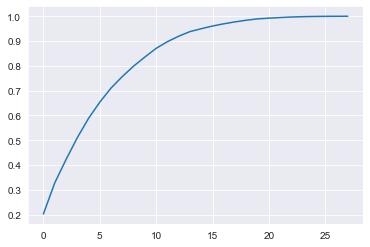

In [1169]:
# Calculate the cumulative variance ration using np.cumssum()
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

print(len(cumulative_explained_variance))

# Plot the cumulative explained variance
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)

##### Note: We are achieving above 80% variance with 10 components

#### F. Display the cumulative explained variance for the first 10 components

In [1170]:
print(cumulative_explained_variance[9])

0.8354672562765674


### Dimensionality Reduction with PCA

#### A. Initialise anf fit another PCA transformation and keep only 10 components

In [1171]:
# Initialise and fit another PCA transformation, keep 10 components
pca_reducedreasons = PCA(n_components=10)

# Fit and transform the reason_data_scaled
PC_reasons = pca_reducedreasons.fit_transform(reason_data_scaled)

# Display the shape of the np array
PC_reasons.shape

(35, 10)

#### B. Put the PC_reasons into a new dataframe

In [1172]:
# Put PC_reasons into a dataframe
reasons_pca_df = pd.DataFrame(PC_reasons)

# Name the columns
reasons_pca_df.columns = ['PC{}'.format(i) for i in range(reasons_pca_df.shape[1])]

# Create the index
reasons_pca_df.index = reason_data.index

# Display first 5 rows
reasons_pca_df.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
EmpID,,,,,,,,,,
1,0.401113,0.220459,0.225494,1.011331,0.072146,0.559133,0.716412,0.304117,-0.296850,0.425026
2,-1.319368,0.506508,-0.518442,0.509469,-0.449593,-0.057582,-0.537269,-0.214075,-0.550675,-0.286434
3,9.061339,-0.683387,-3.184413,-0.562580,-2.297701,1.284714,-2.037033,-1.613696,-0.806991,-0.047471
4,-1.893651,0.589236,-0.698553,-0.184068,-0.093070,0.111821,-0.858443,-0.140154,-0.202192,-0.150917
5,-1.540485,-1.525563,0.869748,0.282102,-2.556348,1.404614,0.114309,1.126348,-0.723220,-1.931248


#### C. Save the dataframe

In [1173]:
reasons_pca_df.to_csv('pca_reason_data.csv')

### III. Clustering Algorithm

We'll compare the clusters made from the above features against those formed from using the features in the  threshold_reason_data and from the analytical base table

- 'analytical_base_table.csv' 
- 'threshold_reason_data.csv'
- 'pca_reason_data.csv'

#### A. Read the above csv files
- set index to EmpID with index_col=0

In [1174]:
# Import analytical_base_table
base_df = pd.read_csv('employee_analytical_base_table.csv', index_col=0)

# Import threshold_reason_data
threshold_reason_data = pd.read_csv('threshold_reason_data.csv', index_col=0)

# Import pca_reason_data
pca_reason_data = pd.read_csv('pca_reason_data.csv', index_col=0)           

In [1175]:
base_df.shape

(35, 15)

In [1176]:
threshold_reason_data.shape

(35, 20)

In [1177]:
pca_reason_data.shape

(35, 10)

We will look at 3 possible feature sets and compare the clusters created from them.

- Only employee absent pattern features ("Base DF")
- Absent pattern features + reasons for absence features chosen by thresholding ("Threshold DF")
- Absent pattern features + principal component features from reasons for absence ("PCA DF")

#### B. Print the shape of each the dataframes read in above, just to make sure they have the same shape
- We should have 14 features for our analytical base table. These are the employee-level absent pattern features.
- We should have 20 features for thresholded reasons features. These are the number of times an employee expresse each of the top 20 most popular reasons.
- We should have 10 features for the PCA item features. These are the first 9 principal component features, ordered by explained variance.

In [1178]:
# Print shape of each dataframe
print('base_df:', base_df.shape)
print('threshold_reason_data', threshold_reason_data.shape)
print('pca_reason_data', pca_reason_data.shape)

base_df: (35, 15)
threshold_reason_data (35, 20)
pca_reason_data (35, 10)


#### C. Create a threshold_df by joining the base_df with the threshold_reason_data

In [1179]:
threshold_df = base_df.join(threshold_reason_data)
threshold_df.head()

,avg_month_absenteeism,min_month_absenteeism,max_month_absenteeism,Age,Total_Absenteeism_hours_per_age,avg_day_absenteeism,min_day_absenteeism,max_day_absenteeism,Transportation expense,Total_Absenteeism_hours_per_transportation,avg_absenteeism_disease,min_absenteeism_disease,max_absenteeism_disease,Body mass index,count_disease_employee,9,21,8,12,6,7,1,14,18,10,11,25,26,22,19,0,13,27,28,23
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,12.100000,1,24,37.0,121.0,24.200000,9,39,235,121,9.307692,0,32,29,13,0,1,0,0,0,1,1,1,1,0,1,2,2,4,1,1,3,0,0,4
2,6.250000,0,24,48.0,25.0,8.333333,8,9,235,25,6.250000,0,16,33,4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,1,1
3,40.166667,10,99,38.0,482.0,96.400000,53,131,179,482,34.428571,0,131,31,14,0,2,0,1,1,0,0,0,2,2,7,2,1,0,0,1,10,38,26,19
4,0.000000,0,0,40.0,0.0,0.000000,0,0,118,0,0.000000,0,0,34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,11.555556,4,24,43.0,104.0,20.800000,0,44,235,104,20.800000,0,68,38,5,0,0,0,0,0,0,0,0,0,0,0,0,9,0,1,5,2,0,0,2


#### D. Create a pca_df dataframe by joining the base_df with the pca_reason_data

In [1180]:
pca_df = base_df.join(pca_reason_data)
pca_df.head()

,avg_month_absenteeism,min_month_absenteeism,max_month_absenteeism,Age,Total_Absenteeism_hours_per_age,avg_day_absenteeism,min_day_absenteeism,max_day_absenteeism,Transportation expense,Total_Absenteeism_hours_per_transportation,avg_absenteeism_disease,min_absenteeism_disease,max_absenteeism_disease,Body mass index,count_disease_employee,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,
1,12.100000,1,24,37.0,121.0,24.200000,9,39,235,121,9.307692,0,32,29,13,0.401113,0.220459,0.225494,1.011331,0.072146,0.559133,0.716412,0.304117,-0.296850,0.425026
2,6.250000,0,24,48.0,25.0,8.333333,8,9,235,25,6.250000,0,16,33,4,-1.319368,0.506508,-0.518442,0.509469,-0.449593,-0.057582,-0.537269,-0.214075,-0.550675,-0.286434
3,40.166667,10,99,38.0,482.0,96.400000,53,131,179,482,34.428571,0,131,31,14,9.061339,-0.683387,-3.184413,-0.562580,-2.297701,1.284714,-2.037033,-1.613696,-0.806991,-0.047471
4,0.000000,0,0,40.0,0.0,0.000000,0,0,118,0,0.000000,0,0,34,1,-1.893651,0.589236,-0.698553,-0.184068,-0.093070,0.111821,-0.858443,-0.140154,-0.202192,-0.150917
5,11.555556,4,24,43.0,104.0,20.800000,0,44,235,104,20.800000,0,68,38,5,-1.540485,-1.525563,0.869748,0.282102,-2.556348,1.404614,0.114309,1.126348,-0.723220,-1.931248


## Model Training

We have our 3 candidate feature sets and the K-Means algorithm imported.

### A. Base_df Clustering
- The first set of features we'll consider is "Base DF". This only includes the absent pattern features from our analytical base table.

#### A.1) Initialise a model pipeline for KMeans 
- The number of clusters is set using n_clusters=3 (we'll try between 3-6 clusters) . This is the hyperparameter  𝑘  (as in "k"-means).
- Set random_state=123 for replicable results.

In [1181]:
# Create a model pipeline for KMeans
kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

In [1182]:
base_df.head(36)

,avg_month_absenteeism,min_month_absenteeism,max_month_absenteeism,Age,Total_Absenteeism_hours_per_age,avg_day_absenteeism,min_day_absenteeism,max_day_absenteeism,Transportation expense,Total_Absenteeism_hours_per_transportation,avg_absenteeism_disease,min_absenteeism_disease,max_absenteeism_disease,Body mass index,count_disease_employee
EmpID,,,,,,,,,,,,,,,
1,12.100000,1,24,37.0,121.0,24.200000,9,39,235,121,9.307692,0,32,29,13
2,6.250000,0,24,48.0,25.0,8.333333,8,9,235,25,6.250000,0,16,33,4
3,40.166667,10,99,38.0,482.0,96.400000,53,131,179,482,34.428571,0,131,31,14
4,0.000000,0,0,40.0,0.0,0.000000,0,0,118,0,0.000000,0,0,34,1
5,11.555556,4,24,43.0,104.0,20.800000,0,44,235,104,20.800000,0,68,38,5
6,14.400000,8,24,33.0,72.0,24.000000,16,32,189,72,14.400000,8,32,25,5
7,7.500000,0,24,39.0,30.0,7.500000,0,22,279,30,7.500000,0,24,24,4
8,0.000000,0,0,39.0,0.0,0.000000,0,0,231,0,0.000000,0,0,35,1
9,52.400000,1,128,58.0,262.0,87.333333,8,243,228,262,52.400000,1,128,22,5


In [1183]:
base_df.columns

Index(['avg_month_absenteeism', 'min_month_absenteeism',
       'max_month_absenteeism', 'Age', 'Total_Absenteeism_hours_per_age',
       'avg_day_absenteeism', 'min_day_absenteeism', 'max_day_absenteeism',
       'Transportation expense', 'Total_Absenteeism_hours_per_transportation',
       'avg_absenteeism_disease', 'min_absenteeism_disease',
       'max_absenteeism_disease', 'Body mass index', 'count_disease_employee'],
      dtype='object')

#### A.2) Fit the KMeans model with base_df

In [1184]:
kmeans.fit(base_df)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=3, n_init=10,
                        n_jobs='deprecated', precompute_distances='deprecated',
                        random_state=123, tol=0.0001, verbose=0))],
         verbose=False)

#### A.3) Call the predict function on the dataset to get the clusters

In [1185]:
# Save the clusters to base_df
base_df['cluster'] = kmeans.predict(base_df)

# Display the first 5 rows
base_df.head()

,avg_month_absenteeism,min_month_absenteeism,max_month_absenteeism,Age,Total_Absenteeism_hours_per_age,avg_day_absenteeism,min_day_absenteeism,max_day_absenteeism,Transportation expense,Total_Absenteeism_hours_per_transportation,avg_absenteeism_disease,min_absenteeism_disease,max_absenteeism_disease,Body mass index,count_disease_employee,cluster
EmpID,,,,,,,,,,,,,,,,
1,12.100000,1,24,37.0,121.0,24.200000,9,39,235,121,9.307692,0,32,29,13,0
2,6.250000,0,24,48.0,25.0,8.333333,8,9,235,25,6.250000,0,16,33,4,0
3,40.166667,10,99,38.0,482.0,96.400000,53,131,179,482,34.428571,0,131,31,14,2
4,0.000000,0,0,40.0,0.0,0.000000,0,0,118,0,0.000000,0,0,34,1,0
5,11.555556,4,24,43.0,104.0,20.800000,0,44,235,104,20.800000,0,68,38,5,0


In [1186]:
base_df.columns

Index(['avg_month_absenteeism', 'min_month_absenteeism',
       'max_month_absenteeism', 'Age', 'Total_Absenteeism_hours_per_age',
       'avg_day_absenteeism', 'min_day_absenteeism', 'max_day_absenteeism',
       'Transportation expense', 'Total_Absenteeism_hours_per_transportation',
       'avg_absenteeism_disease', 'min_absenteeism_disease',
       'max_absenteeism_disease', 'Body mass index', 'count_disease_employee',
       'cluster'],
      dtype='object')

#### A.4) Plot a scatter plot of avg_month_absenteeism and Transportation expense

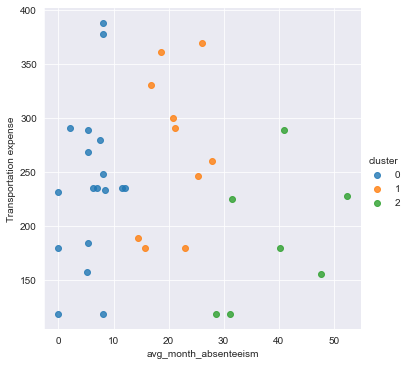

In [1187]:
sns.lmplot(x='avg_month_absenteeism', y='Transportation expense', hue='cluster', data=base_df, fit_reg=False)
plt.show()

#### A.5) Plot a scatter plot of avg_month_absenteeism and count_disease_employee

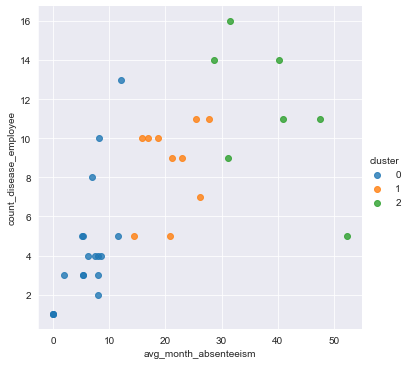

In [1188]:
sns.lmplot(x='avg_month_absenteeism', y='count_disease_employee', hue='cluster', data=base_df, fit_reg=False)
plt.show()

#### A.6) Plot a scatter plot of count_disease_employee and avg_absenteeism_disease

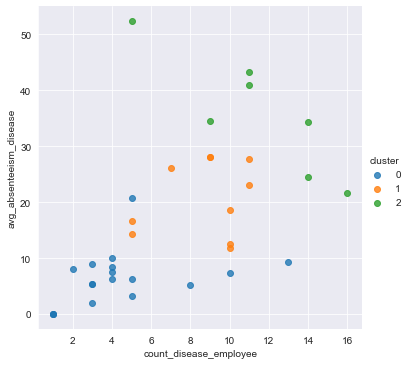

In [1189]:
sns.lmplot(x='count_disease_employee', y='avg_absenteeism_disease', hue='cluster', data=base_df, fit_reg=False)
plt.show()

#### A.7) Plot a scatterplot of age and total absenteeism time in hours

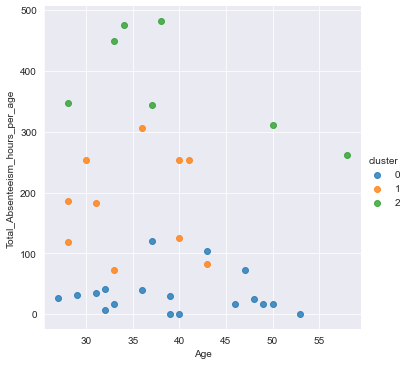

In [1191]:
sns.lmplot(x='Age', y='Total_Absenteeism_hours_per_age', hue='cluster', data=base_df, fit_reg=False)
plt.show()

### B. Threshold DF Clustering

- This includes the absence pattern features from the analytical base table and the resons for the 20 top diseases

#### B.1) Initialise a new model pipeline for K-Means
- Set it to 3 clusters
- Set random_state=123 for replicable results

In [1192]:
kmeans_threshold = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

#### B.2) Fit the KMeans model pipeline to the threshold_df 

In [1193]:
kmeans_threshold.fit(threshold_df)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=3, n_init=10,
                        n_jobs='deprecated', precompute_distances='deprecated',
                        random_state=123, tol=0.0001, verbose=0))],
         verbose=False)

#### B.3) Save the predicted clusters to threshold_df as a new column

In [1194]:
threshold_df['cluster'] = kmeans_threshold.predict(threshold_df) 

# Display the first 5 rows
threshold_df.head()

,avg_month_absenteeism,min_month_absenteeism,max_month_absenteeism,Age,Total_Absenteeism_hours_per_age,avg_day_absenteeism,min_day_absenteeism,max_day_absenteeism,Transportation expense,Total_Absenteeism_hours_per_transportation,avg_absenteeism_disease,min_absenteeism_disease,max_absenteeism_disease,Body mass index,count_disease_employee,9,21,8,12,6,7,1,14,18,10,11,25,26,22,19,0,13,27,28,23,cluster
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,12.100000,1,24,37.0,121.0,24.200000,9,39,235,121,9.307692,0,32,29,13,0,1,0,0,0,1,1,1,1,0,1,2,2,4,1,1,3,0,0,4,0
2,6.250000,0,24,48.0,25.0,8.333333,8,9,235,25,6.250000,0,16,33,4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,1,1,0
3,40.166667,10,99,38.0,482.0,96.400000,53,131,179,482,34.428571,0,131,31,14,0,2,0,1,1,0,0,0,2,2,7,2,1,0,0,1,10,38,26,19,1
4,0.000000,0,0,40.0,0.0,0.000000,0,0,118,0,0.000000,0,0,34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,11.555556,4,24,43.0,104.0,20.800000,0,44,235,104,20.800000,0,68,38,5,0,0,0,0,0,0,0,0,0,0,0,0,9,0,1,5,2,0,0,2,0


#### B.4) Plot a scatterplot using the same above features - avg_month_absenteeism and Transportation expense

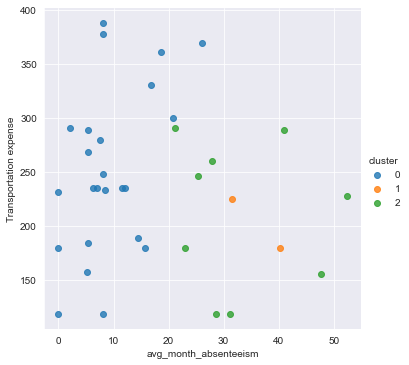

In [1195]:
sns.lmplot(x='avg_month_absenteeism', y='Transportation expense', hue='cluster', data=threshold_df, fit_reg=False)
plt.show()

#### B.5) Plot a scatterplot avg_month_absenteeism and count_disease_employee

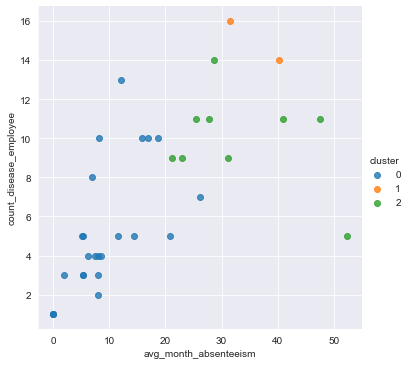

In [1196]:
sns.lmplot(x='avg_month_absenteeism', y='count_disease_employee', hue='cluster', data=threshold_df, fit_reg=False)
plt.show()

#### B.6) Plot a scatter plot of count_disease_employee and avg_absenteeism_disease

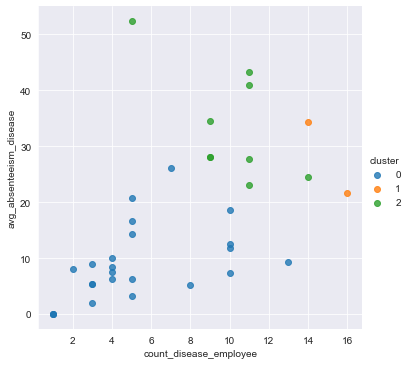

In [1197]:
sns.lmplot(x='count_disease_employee', y='avg_absenteeism_disease', hue='cluster', data=threshold_df, fit_reg=False)
plt.show()

#### B.7) Plot a scatter plot of age and Total_Absenteeism_hours_per_age

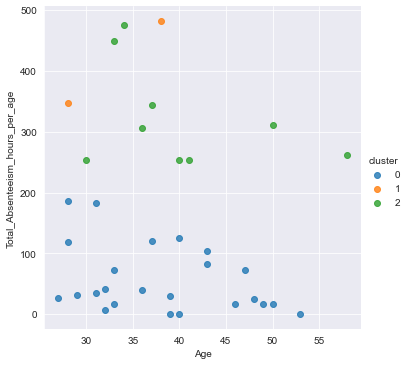

In [1207]:
sns.lmplot(x='Age', y='Total_Absenteeism_hours_per_age', hue='cluster', data=threshold_df, fit_reg=False)
plt.show()

### C. PCA DF Clustering
- This includes the absence pattern features from the analytical base table and the first 10 principal component features.

#### C.1) Initialise a KMeans model pipeline

In [1201]:
kmeans_pca = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

#### C.2) Fit the KMeans model pipeline to the pca_df

In [1202]:
kmeans_pca.fit(pca_df)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=3, n_init=10,
                        n_jobs='deprecated', precompute_distances='deprecated',
                        random_state=123, tol=0.0001, verbose=0))],
         verbose=False)

#### C.3) Save the predicted clusters as a column in pca_df

In [1203]:
pca_df['cluster'] = kmeans_pca.predict(pca_df)

# Display the first 5 rows
pca_df.head()

,avg_month_absenteeism,min_month_absenteeism,max_month_absenteeism,Age,Total_Absenteeism_hours_per_age,avg_day_absenteeism,min_day_absenteeism,max_day_absenteeism,Transportation expense,Total_Absenteeism_hours_per_transportation,avg_absenteeism_disease,min_absenteeism_disease,max_absenteeism_disease,Body mass index,count_disease_employee,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,cluster
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,
1,12.100000,1,24,37.0,121.0,24.200000,9,39,235,121,9.307692,0,32,29,13,0.401113,0.220459,0.225494,1.011331,0.072146,0.559133,0.716412,0.304117,-0.296850,0.425026,0
2,6.250000,0,24,48.0,25.0,8.333333,8,9,235,25,6.250000,0,16,33,4,-1.319368,0.506508,-0.518442,0.509469,-0.449593,-0.057582,-0.537269,-0.214075,-0.550675,-0.286434,0
3,40.166667,10,99,38.0,482.0,96.400000,53,131,179,482,34.428571,0,131,31,14,9.061339,-0.683387,-3.184413,-0.562580,-2.297701,1.284714,-2.037033,-1.613696,-0.806991,-0.047471,1
4,0.000000,0,0,40.0,0.0,0.000000,0,0,118,0,0.000000,0,0,34,1,-1.893651,0.589236,-0.698553,-0.184068,-0.093070,0.111821,-0.858443,-0.140154,-0.202192,-0.150917,0
5,11.555556,4,24,43.0,104.0,20.800000,0,44,235,104,20.800000,0,68,38,5,-1.540485,-1.525563,0.869748,0.282102,-2.556348,1.404614,0.114309,1.126348,-0.723220,-1.931248,0


#### C.4) Plot a scatterplot using the same above features - avg_month_absenteeism and Transportation expense

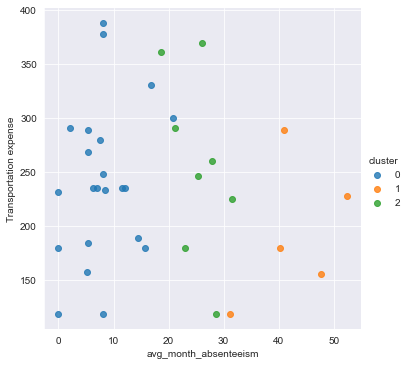

In [1204]:
# Plot avg_month_absenteeism against Transportation Expense
sns.lmplot(x='avg_month_absenteeism', y='Transportation expense', hue='cluster', data=pca_df, fit_reg=False)
plt.show()

#### C.5) Plot avg_month_absenteeism and count_disease_employee

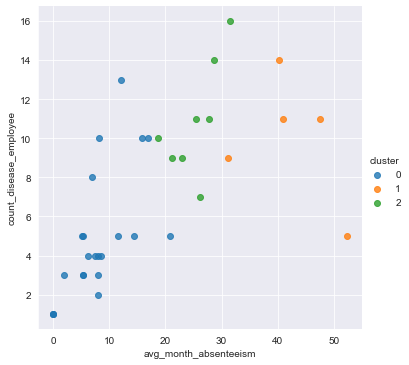

In [1211]:
sns.lmplot(x='avg_month_absenteeism', y='count_disease_employee', hue='cluster', data=pca_df, fit_reg=False)
plt.show()

#### C.6) Plot a scatter plot of count_disease_employee and avg_absenteeism_disease

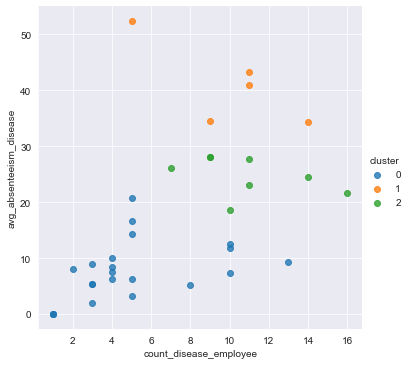

In [1206]:
sns.lmplot(x='count_disease_employee', y='avg_absenteeism_disease', hue='cluster', data=pca_df, fit_reg=False)
plt.show()

#### C.7) Plot a scatter plot of age and Total_Absenteeism_hours_per_age

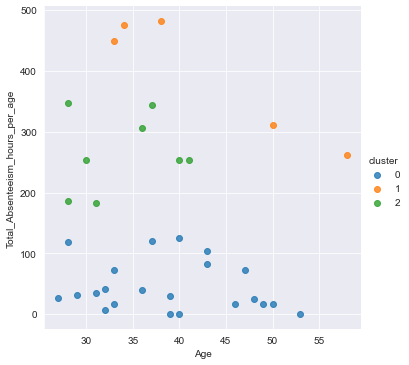

In [1212]:
# Plot a scatter plot of age and Total_Absenteeism_hours_per_age
sns.lmplot(x='Age', y='Total_Absenteeism_hours_per_age', hue='cluster', data=pca_df, fit_reg=False)
plt.show()

#### Compare  additional features using pca_df - the avg_day_absenteeism against the transportation expense

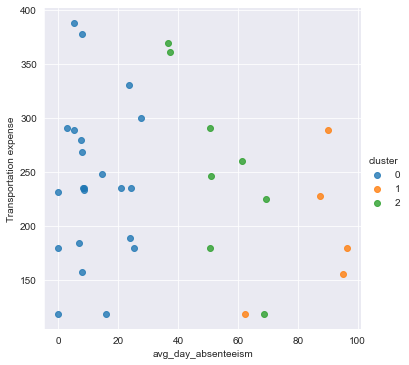

In [1213]:
sns.lmplot(x='avg_day_absenteeism', y='Transportation expense', hue='cluster', data=pca_df, fit_reg=False)
plt.show()

#### Note: Again, there is insufficient data to properly make a decision. However, it seems that the average_day_absenteeism value is higher (>40) when transportation expense exceeds a certain value such as 150

#### Compare additional features using pca_df - the body mass index and the avg_month_absenteeism

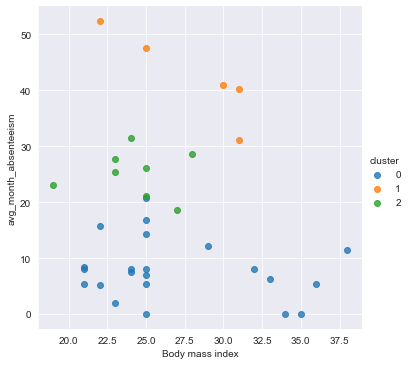

In [1214]:
sns.lmplot(x='Body mass index', y='avg_month_absenteeism', hue='cluster', data=pca_df, fit_reg=False)
plt.show()

#### Compare additional features using pca_df - body mass index with count_disease_employee

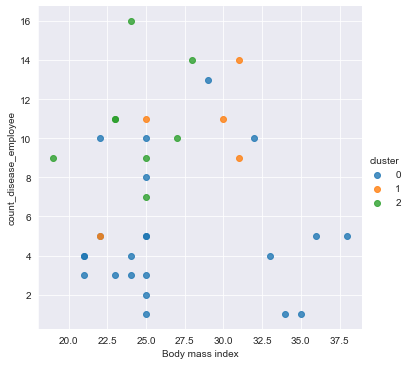

In [1215]:
sns.lmplot(x='Body mass index', y='count_disease_employee', hue='cluster', data=pca_df, fit_reg=False)
plt.show()

## Insights & Analysis

 - There aren't any clear, widely-accepted performance metrics for clustering tasks because we don't have labeled "ground truth."


#### A. Use adjusted_rand_score from sklearn.metrics as a similarity measure between two clusterings

- It essentially counts the observations that were assigned to the same or different clusters by two different clusterings.
- Values close to 0.0 indicate random/independent clusters
- Values close to 1.0 indicate nearly identical clusters

#### B. Display the sdjusted_rand_score between base_df and threshold_df clusters

In [754]:
adjusted_rand_score(base_df.cluster, threshold_df.cluster)

0.5959798390733189

#### C. Display the adjusted_rand_score between base_df and pca_df

In [755]:
adjusted_rand_score(base_df.cluster, pca_df.cluster)

0.7315041248515967

#### D. Display adjusted_rand_score between threshold_df and pca_df

In [757]:
adjusted_rand_score(threshold_df.cluster, pca_df.cluster)

0.7348617693918655

There is not enough data to be able to make a decision. However, it seems that employees who gave a count of diseases betweeb 8 and 12 have a higher absenteeism rate on average than those who gave a lower count. 

Similarly, there is another group of employees who has given the same count of diseases (between 8 and 12), however, they have a much higher rate of absenteeism compared to the former one.

However, it seems that the average_day_absenteeism value is higher (>40) when transportation expense exceeds a certain value such as 150.

Some inconsistencies in the data such as one employee was registered with two ages, the workload field was input with a big numeric value with no indication as to what this might indicate. The workload would have been a good factor to analyse the reason for high absenteeism in employees.

In [1227]:
# Get the disease that stands for reason for absence 9
df_new[df_new['Reason for absence'] == 9]['Disease']

EmpID
24    Diseases of the circulatory system  
24    Diseases of the circulatory system  
28    Diseases of the circulatory system  
34    Diseases of the circulatory system  
Name: Disease, dtype: object

#### Note: The visualisations provided some exploratory analysis such as:
 - the third month recorded the highest absenteeissm rate
 - Reason for absence = 9 - which stands for Disease of the Circulatory system saw the highest absenteeism rate
 - Few features showed correlation - e.g.month/hit target; reason for absence/disciplinary failure; education/social drinker; pet/service time
 
However, the correlations do not seem to shed much light. There is not much more information we can extract - having more data and resolving the inconsistencies would greatly benefit in this analysis, especially in relation to the workload. 

One other feature that is missing in the dataset is the salary. Analysing the salary, workload and the absenteesim time would bring more light to the reasons for absenteeism. Also, probably taking into account overtime hours done by employees, and not paid can also play a role.

#### Building a new model with 2 clusters to check

In [ ]:
pca_df1 = pca_df.copy()

kmeans_pca1 = make_pipeline(StandardScaler(), KMeans(n_clusters=2, random_state=123))
kmeans_pca1.fit(pca_df)

pca_df1['cluster'] = kmeans_pca1.predict(pca_df1)

# Display the first 5 rows
pca_df1.head()

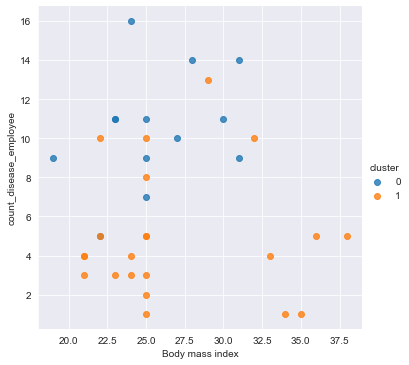

In [1223]:
sns.lmplot(x='Body mass index', y='count_disease_employee', hue='cluster', data=pca_df1, fit_reg=False)
plt.show()

#### Note: The count of diseases per employee seems to take a peak for a higher body mass index (32>bmi>25). However, there is a group with higher bmi (>32), but still show a lower count of diseases. The result is inconclusive, and we would need more data as seen in the other cases. Still, it is good to know that a higher bmi may contribute to the reason for absenteeism in the employees. 